# Week 19 - Regression

This week's exercises will focus on linear regression and the use of different metrics in evaluating regression performance.

The learning objectives of this lab are as follows:
- A. Implement a regression model using modern Python libraries.
- B. Implement and compare four regression metrics.
- C. Explain why datasets are split into training and testing.

To begin, let's set up some imports:

In [51]:
from sklearn.datasets import load_iris, make_regression # Dataset we will be using
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np

## 1. Linear Regression

Sklearn is a open-source, community driven Python library which contains most of the methods we will be using throughout the remainder of this course. This includes Linear Regression!

The code below loads some sample data from an Iris flower dataset. In this case `x` will contain two features: the sepal length and the sepal width of a range of flowers. The target variable `y` is the petal length.

In [52]:
iris_data = load_iris()
iris_x = iris_data['data'][:, :2]
iris_y = iris_data['data'][:, 2]

### 1.1 TASK
Use the `LinearRegression` class to create a linear model fitting `iris_x` to `iris_y`, the steps to do this are as follows:

1. Instantiate an object of class LinearRegression.
2. Call the `.fit(...)` function on your LinearRegression object using the appropriate `iris_x` and `iris_y` parameters to generate a linear model.
3. Get predictions for your model and store them in a `lrg_preds` variable, to do this you should use the `.predict(...)` function.

For help in the above task, refer to the [Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

Once you've got a model and a set of predictions, you've completed the task!

In [53]:
linear_model = LinearRegression()
linear_model.fit(iris_x, iris_y)
lrg_preds = linear_model.predict(iris_x)

Now we can query the model to find out its coefficients and y intercept using the model's `.coef_` and `intercept_` attributes.

In [54]:
linear_model.coef_, linear_model.intercept_

(array([ 1.77559255, -1.33862329]), -2.524761511833392)

The coeficients are the equivalent to the parameters ($\theta_{1,2}$) for each feature ($x_1$ and $x_2$), the y intercept is equivalent to $\theta_0$ (the bias of the model).

Therefore, the optimal parameters are as follows:

$$\theta=\begin{bmatrix} {intercept} \\ {coef(0)} \\ {coef(1)} \end{bmatrix}$$

Remember to make our lives easier we assume $x_0$ is always 1, e.g.:

$$x^0 = \begin{bmatrix} 1 \\ x^{0}_{1} \\ x^{0}_{2} \end{bmatrix}$$

This gives us a hypothesis function of:

$$h_{\theta}(x)=(intercept)(x_0) + (coef[0])(x_1) + (coef[1])(x_2)$$

### 1.2 TASK

Complete the method below such that it acts as a generalised hypothesis function for a given set of parameters ($\theta$) and an input ($x^1$).

1. parameters will be a Numpy array of length m+1 where m is the number of features.
2. input_vector will be a Numpy array of length m.

In [55]:
def hypothesis(parameters, input_vector):
    insert_ones = np.insert(input_vector, 0, 1)
    return np.dot(parameters, insert_ones)

## 2. Cost Functions

In order to evaluate the performance of the model we need to define our cost functions.

A common cost function is the Mean Squared Error (MSE). However, there are alternatives, for example the Mean Absolute Error (MAE) and Root-Mean Squared Error (RMSE). The equations for each of these is given below where $y$ is the set of true values, $\hat{y}$ is the set of predictions and $n$ is the number of items in the predictions set.
The equation for the MSE is given below:

$$ MSE(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}{(y_{i}-\hat{y_i})^2}$$

$$ MAE(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}{(|y_{i}-\hat{y_i})|}$$

$$ RMSE(y, \hat{y}) = \sqrt{\frac{1}{n}\sum_{i=1}^{n}{(y_{i}-\hat{y_i})^2}}$$

### 2.1 TASK

Implement these three functions using the skeleton code below.

In [56]:
def mse(predictions, truth):
    n = len(predictions)
    return (1/n)*np.sum((truth-predictions)**2)

In [57]:
def mae(predictions, truth):
    n = len(predictions)
    return (1/n)*np.sum(np.abs(truth-predictions))

In [58]:
def rmse(predictions, truth):
    return np.sqrt(mse(predictions, truth))

It's important to recognise the differences between these functions and the technical caveats when using them.

For example, let's take a simple dataset consisting of one variable $(x)$, some true outputs $(y)$ and two sets of predictions $(\hat{y_{0}}, \hat{y_{1}})$. We can define these as Numpy arrays as shown below:

In [59]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
preds_0 = np.array([0.8, 2.2, 1.1, 3.7, 5.5])
preds_1 = np.array([0.1, 2.9, 3.1, 4.8, 5.8])

To begin let's visualise the data:

(0.0, 6.0)

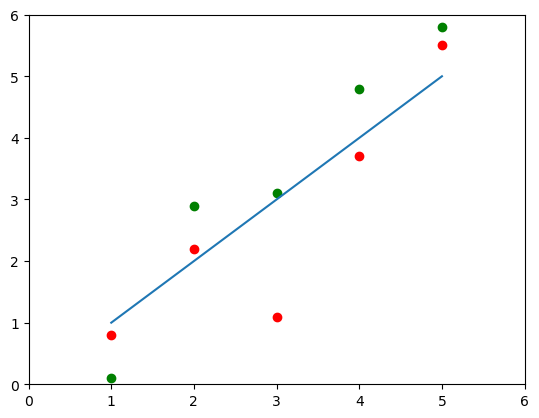

In [60]:
plt.plot(x, y)
plt.scatter(x, preds_0, c='r')
plt.scatter(x, preds_1, c='g')
plt.ylim([0, 6])
plt.xlim([0, 6])

As we can see, neither of the predictions are a great match to the intended output. However, there are some subtle differences. For example, the red predictions are pretty good except for an anomaly at position 3 where as the greens are more variable but consistent.

### 2.2 TASK

In the space below use your cost functions to evaluate both `preds_0` and `preds_1`.

In [61]:
print(f"""MSE preds_0: {mse(y, preds_0)}""")
print(f"""MSE preds_1: {mse(y, preds_1)}""")

print(f"""MAE preds_0: {mae(y, preds_0)}""")
print(f"""MAE preds_1: {mae(y, preds_1)}""")

print(f"""RMSE preds_0: {rmse(y, preds_0)}""")
print(f"""RMSE preds_1: {rmse(y, preds_1)}""")

MSE preds_0: 0.8059999999999999
MSE preds_1: 0.5819999999999999
MAE preds_0: 0.62
MAE preds_1: 0.7
RMSE preds_0: 0.8977750274985375
RMSE preds_1: 0.762889244910426


### 2.2.1 Discussion
Mean Squared Error: Measures average squared difference between the actual values and the pridicted values. Peanlises larger errors more than smaller errors because of squaring. It is sensitive to outliers.
Used in regression problems.

Mean Absolute Error: Measures the absolute difference between the actual values and the predicted values. Less sensitive to outliers. 
Used when outliers are common and you want to minimize the impact of large errors.

Root Squared Mean Error: Estimate of standard diviation of errors.It peanalises larger errors more heavily than smaller errors. It is sensitive to outliers.
Used in regression problems where you want to express error in the same unit as target variable.

N.B: We can use all these errors to see if there any outliers in the data. If there is a large difference between the RMSE and MAE, then it is likely that there are outliers in the data.

Hopefully you'll notice how the difference metrics give different indicators as to which prediction set is better.

As a general rule of thumb the `MSE` and `RMSE` error metrics apply harsher penalties to larger errors. It's also worth noting that RMSE is provided in the same units as $y$.

I suggest you take some time to explore this by changing the values in `preds_0` and `preds_1` to see what other things you notice.

### 2.3 TASK
Now you've got a handle on the cost functions above, use the space below to evaluate (in your own words) how your model from section 1 performs.

In [62]:
print(f"""MSE : {mse(iris_y, lrg_preds)}""")
print(f"""MAE : {mae(iris_y, lrg_preds)}""")
print(f"""RMSE : {rmse(iris_y, lrg_preds)}""")

MSE : 0.40957831218050467
MAE : 0.5162246726456128
RMSE : 0.6399830561667275


## 2. Problem

Now it's your turn to resolve a regression problem using a new error metric.

The $R^2$ metric is known as the coefficient of determination and provides a way of measuring the 'goodness of fit' of a given model. Technically it describes the percentage of variation which can be explained by the $x$ values. The equation for calculating $R^2$ is given below:

$$ R^{2}=1-\frac{\sum{(y_i - \hat{y_i})^2}}{\sum{(y_i - \bar{y})^2}}$$

here $y_i$ is a true value for item $i$, $\hat{y_i}$ is the prediction for item $i$ and $\bar{y}$ is the average value of $y$. For more information refer to $R^2$ documentation [here](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html).

Below you have been given both a dataset consisting of 5 features and 1 output value, using what you've learnt in this exercise sheet you must:
1. Write a new function which calculates the $R^2$ value for a given set of predicted and true values.
2. Train a linear regression model using the training data.
3. Perform an evaluation of the model using the testing data and the three evaluation metrics you implemented in section 2 and your new $R^2$ metric.

An outline has been provided through the use of headings.

### Dataset

In [63]:
X, Y = make_regression(n_samples=200, n_features=5, n_informative=5, noise=10, random_state=0)

### R-Squared Method

In [64]:
def r_squared(predictions, truth):
    y_bar = np.mean(truth)
    return 1-((np.sum(truth - predictions)**2)/(np.sum((truth-y_bar)**2)))

### Training a model

In [65]:
model = LinearRegression()
model.fit(X, Y)
preds = model.predict(X)

### Testing a model

In [66]:
print(f"""MSE : {mse(Y, preds)}""")
print(f"""MAE : {mae(Y, preds)}""")
print(f"""RMSE : {rmse(Y, preds)}""")
print(f"""R Squared : {r_squared(Y, preds)}""")

MSE : 106.05540331450226
MAE : 8.25503219975435
RMSE : 10.298320412305214
R Squared : 1.0


## 3. Independent Learning

Now it's time for you to do some independent learning, using the great power of Google along with the following resources explore the roles of 'Training', 'Testing' and 'Validation' datasets.

> https://mlu-explain.github.io/train-test-validation/

By the end of your reading you must be able to answer the following questions:

1. Describe the terms training, testing and validation datasets.

In [67]:
import os

print(os.getcwd())

/Users/varniethan


2. What are the most common ratios for splitting data between training, testing and validation?

In [68]:
"""
60%-80% training data
10%-20% testing data
10%-20% validation data
"""


'\n60%-80% training data\n10%-20% testing data\n10%-20% validation data\n'

3. What are the advantages and disadvantages to splitting data this way?

Finally, if you want to explore further regression metrics feel free to take a look at the sklearn metrics available [here](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) in future exercises do not feel you need to implemented regression metrics by first-principles you may use the sklearn implementations.

## (Optional) 4. House Prices [Pandas]

A dataset has been provided on Moodle called 'house_price.csv' which contains details of home sales, below I have provided code which displays the first five rows of the dataset and how to extract certain parts of the data.

In [69]:
import pandas as pd

In [70]:
# Load the dataset
dataset = pd.read_csv("/Users/varniethan/Projects/Machine-Learning/19. Regression Metrics and Datasets/house_price_data.csv")

In [71]:
# Show the first five rows
dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [72]:
# Extract the column of bedrooms
dataset['bedrooms']

0        3
1        3
2        2
3        4
4        3
        ..
21608    3
21609    4
21610    2
21611    3
21612    2
Name: bedrooms, Length: 21613, dtype: int64

### TASK 4.1: Split Data

Your first task is to split the data into at least a train and test set.

In [73]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2)

### TASK 4.2: Predicting House Price

Using the training data you extracted perform three experiments using different sets of features (e.g. bedrooms and bathrooms or bedrooms and sqft_living) to predict the price of the house.

### Task 4.3: Evaluate Selections

Evlauate your models from task 4.2 using your test data from task 4.1. Which model predicts house price the best? Why do you think that is?